<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [2]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [3]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='figuras/Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [4]:
ensaios = np.array( [ [-1, -1], [1, -1], [-1, 1], [1, 1] ] )

### pyDOE2

https://pypi.org/project/pyDOE2/

In [5]:
# essa bibilioca nos auxilia a construção de planejamento fatoriais
!pip install pyDOE2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25539 sha256=4dcb6f960f88a16d426f982d05b9221f8bdc67e7227e1a287474a8db53c4b503
  Stored in directory: /root/.cache/pip/wheels/49/91/2d/d08e80806bf7756193541f6c03c0492af288fcd6158d3d0998
Successfully built pyDOE2


In [6]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [7]:
# ff2n = ensaios fatoriais com 2 niveis, superior e inferior
# o 2 é o número de ensaios manipuláveis 
ensaios = doe.ff2n(2)

In [8]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [9]:
experimento = pd.DataFrame(ensaios, columns = ['Farinha', 'Chocolate'])

In [10]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [11]:
experimento['Porcoes'] = [19, 37, 24, 49]

In [12]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [13]:
import seaborn as sns

In [14]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para a farinha

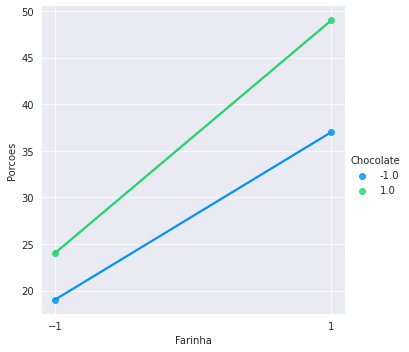

In [15]:
# gráfico em relação a farinha no nivel inferior e chocolate no nivel superior
# entao a linha azul mostra o efeito da farinha quando o chocolate está no nivel inferior 
# e a linha verde mostra o efeito da farinha quando o chocolate está no nivel superior
# ci tira o intervalo de confiança e o hue, coloca mais uma varável no gráfico
# quanto mais inclinado está a reta, maior sera o efeito da variável manipulado
# então provavelmente existe algum efeito de interação entre o chocolate e a farinha
#a farinha tem efeito positivo na produção de cupcake
ax1 = sns.lmplot(data = experimento, x = 'Farinha', y = 'Porcoes', ci = None, hue = 'Chocolate')

# no eixo X estava mostrando valores inúteis, então com essa função, vc altera
ax1.set(xticks = (-1, 1))

### Para o chocolate

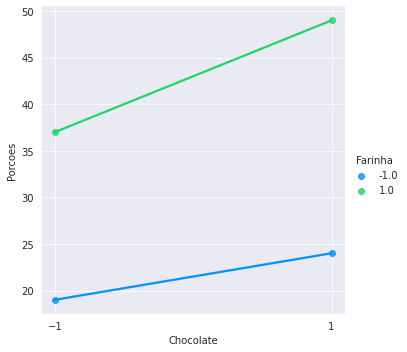

In [16]:
# gráfico em relação ao chocolate no nivel inferior e farinha no nivel superior
# linha azul mostra o efeito do chocolate quando a farinha esta no nivel inferior
# linha verde mostra o efeito do chocolate quando a farinha esta no nivel superior
ax2 = sns.lmplot(data = experimento, x = 'Chocolate', y = 'Porcoes', ci= None, hue = 'Farinha')
ax2.set(xticks = (-1, 1))

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>


### Bibliotecas  Stats Model


In [17]:
# o intercepto = B0 é a média das respostas experimentais
# Ajuste dos parâmetros do modelo
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### .

In [18]:
#OLS vai ajustar os coeficiente do modelo aos dados experimentais
modelo = smf.ols( data = experimento, formula = ' Porcoes ~ Farinha + Chocolate + Farinha:Chocolate ' )

In [19]:
# ajusatando os parâmetros do modelo
modelo_ajustado = modelo.fit()

In [20]:
# vendo os resultados do modelo de ajuste
print(modelo_ajustado.summary())
# na tabela o DF Residuals, significa os graus de liberdade dos resíduos

# a farinha tem maior efeito no chocolate
# agora temos que avaliar no ponto de vista estatistico se esses
# coeficiente ajustados são iguais ou diferentes de 0
# se forem diferentes de 0, vamos dizer que eles influenciam a quantidade de 
# cupcake produzidos.
# em outras palavras vamos dizer que os coeficientes ajustados é significativo
# e esse tipo de análise é chamado de análise de significancia estatistica

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 25 Jul 2022   Prob (F-statistic):                nan
Time:                        15:24:14   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: invalid value encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='figuras/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [21]:
# n --> número de ensaios, p --> número de parâmetros no modelo
# Graus de liberdades dos Resíduos = GRL = n - p = GRL = 4 - 4 = 0
# para aumentar os GRL precisa de mais ensaios

centro = np.array( [ [0,0,29], [0,0,30], [0,0,29], [0,0,30] ])

In [22]:
centro_dataframe = pd.DataFrame( centro, columns = ['Farinha', 'Chocolate', 'Porcoes'], index = [4, 5, 6, 7])

In [23]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [24]:
experimento = experimento.append(centro_dataframe)

In [25]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [26]:
# criando o modelo
modelo = smf.ols( data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate' )

In [27]:
# dps de criar o modelo, ajustamos ele com o fit()
modelo_ajustado = modelo.fit()

In [28]:
print(modelo_ajustado.summary())

# P>|t| signficia que se os valores forem maior que 0.05, significa que a variável
# é não significante, não serve pra nada, lembrando que 0.05 é o valor mais usado
# entao a combinação de Farinha:Chocolate, é uma combinação não significante
# não muda nada ter ela ou não na nossa receita de cupcake

# já o 't' é ao contrario de P>|t|

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 25 Jul 2022   Prob (F-statistic):            0.00152
Time:                        15:24:14   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='figuras/Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='figuras/Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='figuras/Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='figuras/Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='figuras/Figura_8.png'> 


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='figuras/Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

In [29]:
t_valores = modelo_ajustado.tvalues

In [30]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [31]:
nome = t_valores.index.tolist()

In [32]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### .

In [33]:
from scipy import stats

### .


In [34]:
# eu passo os GRL que é 4
distribuicao = stats.t(df = 4)

In [35]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [36]:
limite = [distribuicao.ppf(q = 1 - 0.025)] * len(nome)

In [37]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

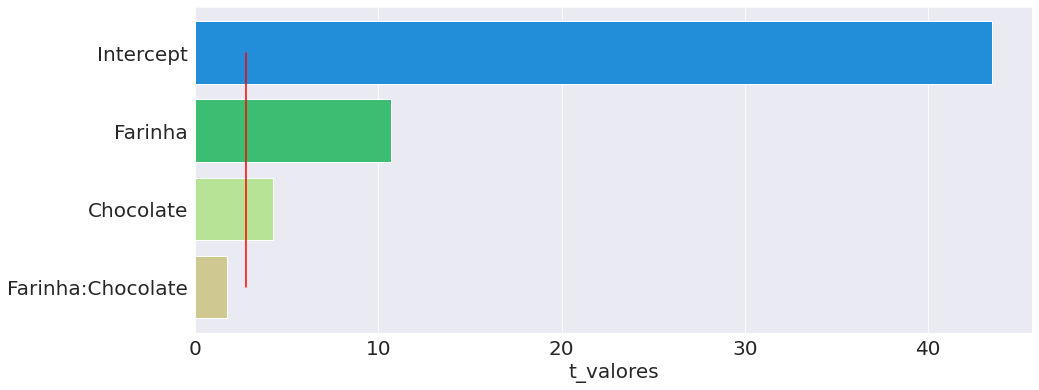

In [38]:
# o 't' ele é uma distribuição bicaudal, como é usado 5% de significancia 
# ele divide 2,5% negativo e positivo, para rejeitarmos t, os valores tem 
# que ser maior que 2,5%. Que é ao contrarios de P>|t|, que precisa ser menor
# que a significancia.
# o grafico a baixo mostra as variáveis que são maiores que t
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('t_valores', fontsize = 20)
pareto.plot(limite, nome, 'r')

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='figuras/Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [39]:
# já que a junção da farinha e chocolate não é significativo pro modelo
# devemos criar um novo modelo com apenas as variáveis significativas
modelo_2 = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate')

In [40]:
modelo_ajustado_2 = modelo_2.fit()

In [41]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           0.000571
Time:                        15:24:39   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [42]:
t_valores = modelo_ajustado_2.tvalues

In [43]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [44]:
nome = t_valores.index.tolist()

In [45]:
nome

['Intercept', 'Farinha', 'Chocolate']

### .

In [50]:
distribuicao = stats.t(df = 5)

In [51]:
distribuicao.ppf(q = 1 - 0.025)

2.5705818366147395

In [54]:
# criando a linha t
limite = [distribuicao.ppf(q = 1 - 0.025)] * len(nome)
limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

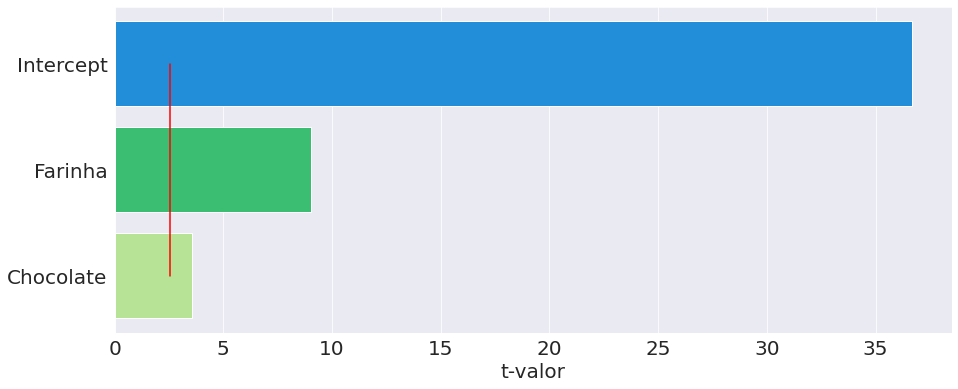

In [55]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('t-valor', fontsize = 20)
pareto.plot(limite, nome, 'r')

# concluindo essa fase de avaliação de significância e estatística do modelo 
# nós podemos usar o modelo para prever as condições dos experimento da receita
# e como se comportara em outras condições que não foram observada durante o 
# experimento.

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [57]:
# se o nosso modelo for representativo da realidade, nós seremos capazes de utilizar
# esse modelo para obter informações sobre a quantidade de cupcake produzidos
# para saber como nosso modelo é representativo da realidade 
# a gente faz uma comparação dos valores preditos com os observados
# preditos é os valores do modelo deu
# observados é os valores reais dos experimentos
observados = experimento['Porcoes']

In [58]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

### .

In [59]:
# o predict pega as mesmas condições do experimento e vai obter como resultado
# o valor do modelo nessas mesmas condições
preditos = modelo_ajustado_2.predict()

In [61]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [62]:
import matplotlib.pyplot as plt

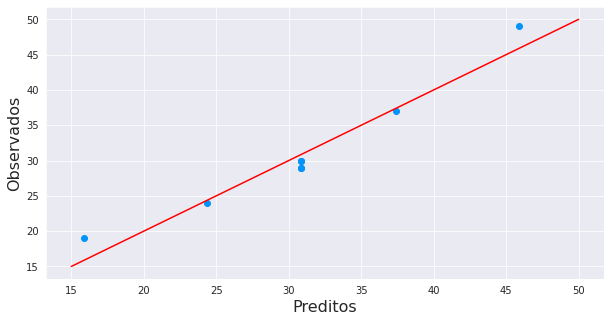

In [68]:
plt.figure(figsize = (10, 5))
plt.xlabel('Preditos', fontsize = 16)
plt.ylabel('Observados', fontsize = 16)

# linha de guia ideal para o nosso modelo, onde a condição que os valores
# preditos seja exatamente igual aos valores observados
# start é o valor minimo entre os valores observados e preditos e o stop
# é o maior valor entre os dois novamente, num é o tanto de valores que vc 
# quer entre o start e o stop
x = np.linspace(start= 15, stop = 50, num = 10)
y = np.linspace(start = 15, stop = 50, num = 10)

plt.plot(x, y, 'r')

# comparação
plt.scatter(preditos, observados)

# os valores preditos não cairam na linha, mas isso é completamente normal
# como os valores estão bem próximo da linha, nós podemos dizer que o modelo
# é representativo da realidade 

<hr>

In [69]:
# R² = R-squared, quanto mais próximo de 1, melhor é o ajuste do nosso modelo
# com essa informação é mais facil saber se o nosso modelo é representativo
# sem montar todo aquele gráfico.
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           0.000571
Time:                        16:00:14   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [71]:
# criando uma função para utilização do modelo
parametros = modelo_ajustado_2.params

In [72]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [73]:
def modelo_receita(x_f, x_c):
  #limites
  limite_normalizado = [-1,+1]
  limite_farinha = [0.5,1.5]
  limite_chocolate = [0.1,0.5]

  # converter
  x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
  x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)

  porcoes = parametros['Intercept'] + parametros['Farinha'] * x_f_convertido + parametros['Chocolate'] * x_c_convertido
  return round(porcoes)

In [113]:
# o modelo não está normalizado
modelo_receita(0.5, 0.1)

37


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'> 


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='figuras/Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

In [93]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [94]:
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num = 10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### . 

In [97]:
pontos = []

# o primeiro for vai percorrer a quantidade de farinha
for cont1 in x_farinha:
  temp = []
  # segundo for quantidade de chocolate
  for cont2 in x_chocolate:
    temp.append(modelo_receita(cont1, cont2))
  pontos.append(temp)

In [98]:
pontos

[[37, 37, 37, 37, 37, 38, 38, 38, 38, 38],
 [38, 38, 38, 38, 39, 39, 39, 39, 39, 40],
 [39, 39, 39, 40, 40, 40, 40, 40, 41, 41],
 [40, 40, 41, 41, 41, 41, 41, 42, 42, 42],
 [41, 42, 42, 42, 42, 42, 43, 43, 43, 43],
 [43, 43, 43, 43, 43, 44, 44, 44, 44, 44],
 [44, 44, 44, 44, 45, 45, 45, 45, 45, 46],
 [45, 45, 45, 46, 46, 46, 46, 46, 47, 47],
 [46, 46, 47, 47, 47, 47, 47, 48, 48, 48],
 [47, 48, 48, 48, 48, 48, 49, 49, 49, 49]]

### .

### Construindo a superfície de resposta

In [100]:
# criando o mapa de cor
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

<a list of 8 text.Text objects>

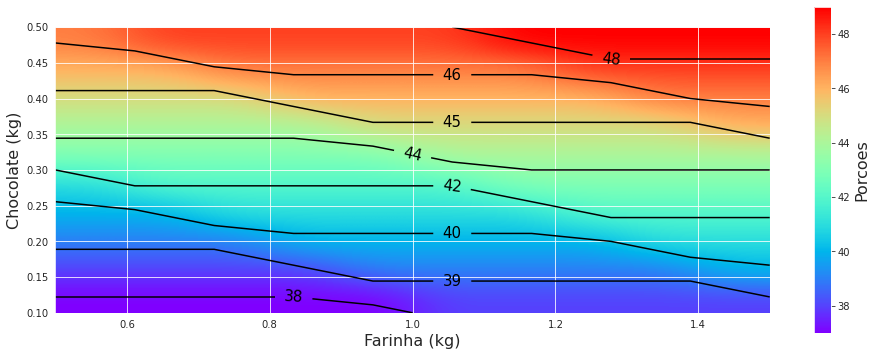

In [111]:
# base
plt.figure(figsize = (16, 6))
plt.xlabel('Farinha (kg)', fontsize = 16)
plt.ylabel('Chocolate (kg)', fontsize = 16)

# mapa de cores
# 1º é a base de dados, 2º o gráfico vem de ponta cabeça, esse parâmetro faz virar o gráfico
# 3º as cores do mapa, 4º como nem todos os pontos foram calculados, esse quadric ele calcula os pontos que falta
# e 5º a extensão do gráfico
mapa_cor = plt.imshow(pontos, origin = 'lower', cmap = cm.rainbow, interpolation = 'quadric', extent = (0.5,1.5, 0.1,0.5))

# Barra de cor
plt.colorbar().set_label('Porcoes', fontsize=16)

# inserindo linhas de guias
linhas = plt.contour(x_farinha, x_chocolate, pontos, colors='k', linewidths=1.5)
plt.clabel(linhas, inline = True, fmt='%1.0f', fontsize = 15.0, inline_spacing=10)